# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Exploratory Data Analysis

In [3]:
data = pd.read_csv('beer-servings.csv', index_col=False)

In [4]:
data.shape

(193, 7)

In [5]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


In [6]:
data = data.iloc[:, 1:]

In [7]:
data.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe


# Data Cleaning/Preprocessing

## Duplicate Row Removal

In [8]:
data.duplicated().sum()

np.int64(0)

## Check Missing values

In [9]:
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


## Splitting Numerical and Categorical Columns

In [10]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

## Check histogram of Numerical features for data imputation

['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


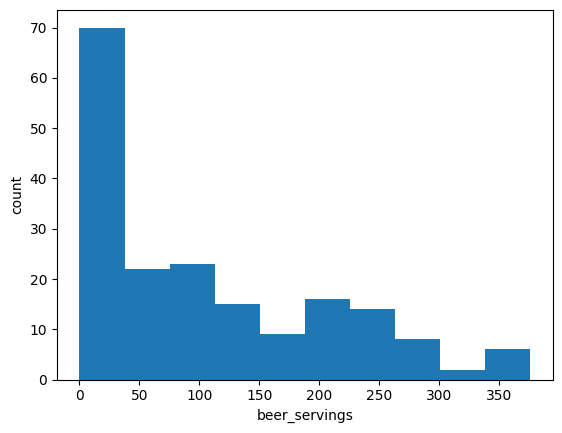

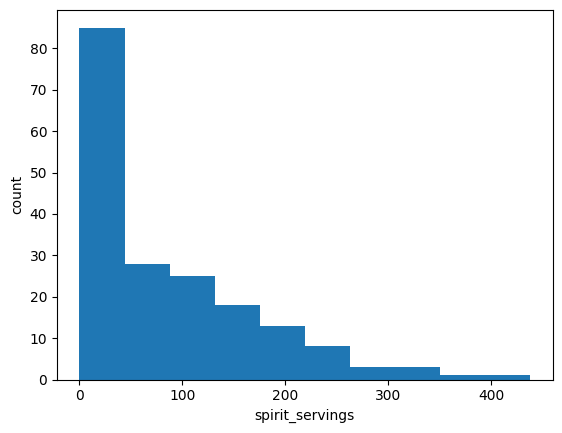

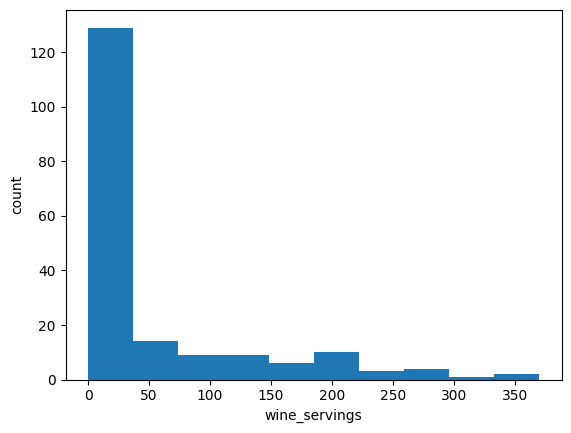

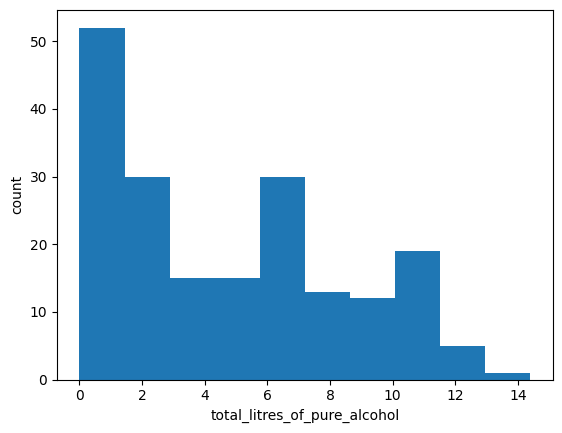

In [11]:
num_cols = num_df.columns.tolist()
print(num_cols)
for col in num_cols:
  plt.hist(num_df[col])
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [12]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [13]:
num_df.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


## Outlier Handling

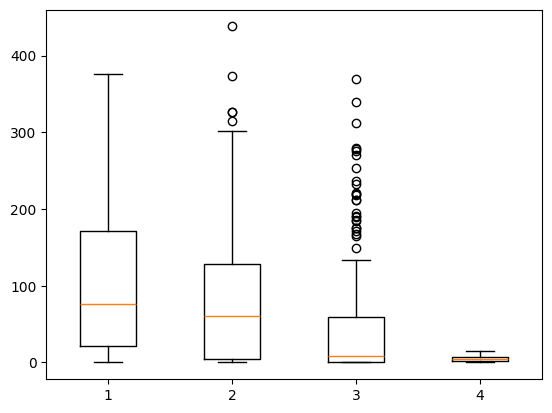

In [14]:
plt.boxplot(num_df)
plt.show()

In [15]:
def replace_outliers_with_upper_bound(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [16]:
for col in num_cols:
  num_df[col] = replace_outliers_with_upper_bound(num_df, col)

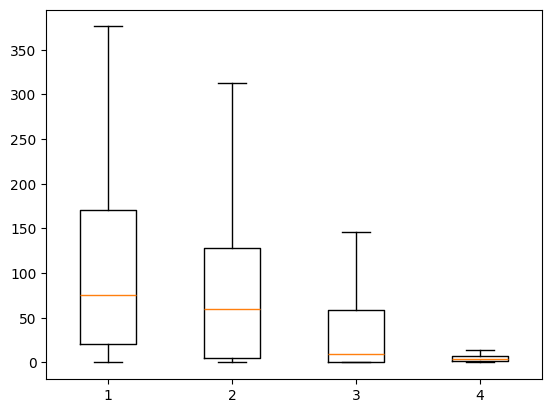

In [17]:
plt.boxplot(num_df)
plt.show()

## Data Normalization


*   Min-Max Scaling
*   Standard Scaling



In [18]:
num_df.head(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9


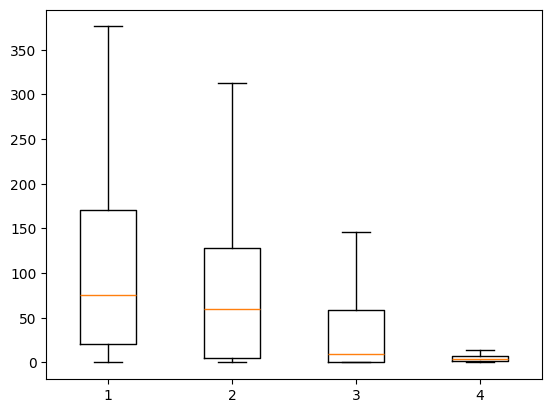

In [19]:
plt.boxplot(num_df)
plt.show()

## Scaling without Library

In [20]:
# Min-max scaling
for col in num_cols[:-1]:
  num_df[col] = (num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())

In [21]:
# Standard scaling
for col in num_cols[:-1]:
  num_df[col] = (num_df[col]-num_df[col].mean())/num_df[col].std()

## Scaling with Library

In [ ]:
# pip install scikit-learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(num_df)
num_df = scaler.transform(num_df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
num_df = min_max_scaler.fit_transform(num_df)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
num_df = std_scaler.fit_transform(num_df)

In [ ]:
import pickle

with open("min_max_scaler.pkl", "wb") as f:
    pickle.dump(min_max_scaler, f)

In [ ]:
with open("min_max_scaler.pkl", "rb") as f:
    min_max_scaler = pickle.load(f)

In [ ]:
num_df = pd.DataFrame(num_df, columns=num_cols[:-1])

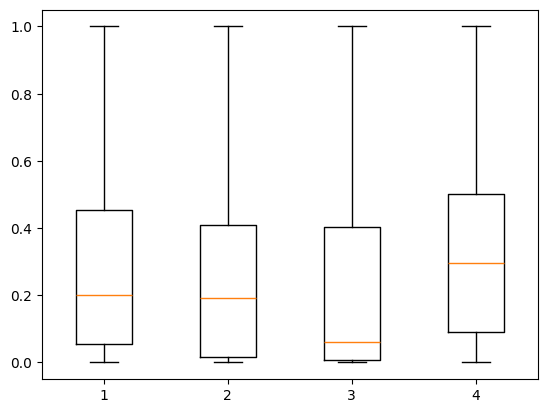

In [ ]:
plt.boxplot(num_df)
plt.show()

## Encoding of Categorical Variables

## One-hot Encoding

In [27]:
data = {'color': ['yellow', 'green', 'blue', 'yellow', 'green']}
df = pd.DataFrame(data)
df

,color
0,yellow
1,green
2,blue
3,yellow
4,green


In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['color']])
encoded_df = pd.DataFrame(encoded_data, columns=['blue','green', 'red'])
final_df = pd.concat([df, encoded_df], axis=1)
final_df

,color,blue,green,red
0,yellow,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,yellow,0.0,0.0,1.0
4,green,0.0,1.0,0.0


In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[['color']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))
final_df = pd.concat([df, encoded_df], axis=1)
final_df

,color,color_blue,color_green,color_yellow
0,yellow,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,yellow,0.0,0.0,1.0
4,green,0.0,1.0,0.0


In [24]:
data = {'color': ['red', 'green', 'blue', 'red', 'green', 'yellow']}
df = pd.DataFrame(data)
df

,color
0,red
1,green
2,blue
3,red
4,green
5,yellow


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['color_encoded'] = encoder.fit_transform(df['color'])
df

,color,color_encoded
0,red,2
1,green,1
2,blue,0
3,red,2
4,green,1
5,yellow,3


In [ ]:
cat_df.head(2)

,country,continent
0,Afghanistan,Asia
1,Albania,Europe


In [ ]:
cat_cols = cat_df.columns.tolist()

In [ ]:
for col in cat_cols:
  print(cat_df[col].value_counts())

country
Afghanistan    1
Libya          1
Niger          1
Nigeria        1
Niue           1
              ..
Greece         1
Grenada        1
Guatemala      1
Guinea         1
Zimbabwe       1
Name: count, Length: 193, dtype: int64
continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
  encoder = LabelEncoder()
  cat_df[col] = encoder.fit_transform(cat_df[col])

In [ ]:
cat_df

,country,continent
0,0,1
1,1,2
2,2,0
3,3,2
4,4,0
...,...,...
188,188,5
189,189,1
190,190,1
191,191,0


In [ ]:
import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [ ]:
with open("label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

In [ ]:
final_df = pd.concat([num_df, cat_df], axis=1)

In [ ]:
final_df.head()

,beer_servings,spirit_servings,wine_servings,country,continent
0,0.0,0.0,0.0,0,1
1,89.0,132.0,54.0,1,2
2,25.0,0.0,14.0,2,0
3,245.0,138.0,312.0,3,2
4,217.0,57.0,45.0,4,0


# Separate Features and Labels

In [ ]:
y = final_df["total_litres_of_pure_alcohol"]
X = final_df.drop("total_litres_of_pure_alcohol", axis=1)

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling

In [ ]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

# Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()